# * Env Set

In [ ]:
# pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
# pd.set_option('display.width', 1000)
# dfX_std_scaled_3area_pca_df

# * Importing Part

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier,\
                             AdaBoostClassifier, GradientBoostingClassifier
import xgboost
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score, GridSearchCV

/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# * Function Moduling Part

In [100]:
# encogin categorical values for further processing
def encode_cat(df):
    """
       Input : train_df 
       Output : encoded_train_df
    """
    # get categorical(type='object') variable
    cat_var_df = df.select_dtypes(include=['object']).copy()    
    
    cleanup_nums = {}
    
    # species columns encoding
    spe_index = 0
    spe_enc_dict = {}
    spe_enc_list = []
    for key in set(cat_var_df['species'].values):
        spe_enc_dict[key] = spe_index
        spe_index += 1
        
        # keep list for final recovery
        spe_enc_list.append(key)
    cleanup_nums['species'] = spe_enc_dict
    
    try:
        cat_var_df.replace(cleanup_nums, inplace=True)
    except:
        pass
    
    df = df.drop(cat_var_df.columns, axis=1)
    df = pd.concat([df, cat_var_df], axis=1)
    return df, spe_enc_list

# * Data handling Part

In [101]:
train_processed_df = pd.read_csv("../train_processed_df_20171121.csv")
test_processed_df = pd.read_csv("../test_processed_df_20171121.csv")

dfy, sub_list = encode_cat(pd.read_csv("../train.csv")[['species']].copy())
dfy = dfy.iloc[:, 0]
dfX = train_processed_df.drop(['id', 'species'],axis=1).copy()

dfX_test = test_processed_df.drop(['id'],axis=1).copy()
test_id_df = test_processed_df['id'].copy()

In [48]:
print(train_processed_df.shape)
print(test_processed_df.shape)

print(dfX.shape)
print(dfy.shape)

(990, 249)
(594, 248)
(990, 247)
(990,)


In [50]:
train_processed_df.describe()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,42,43,44,45,46,47,48,49,id,species
count,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,...,990.0,990.0,990.0,990.0,990.0,990.0,990.0,990.0,990.000000,990.000000
mean,-5.354864e-17,1.053030e-16,-1.409121e-16,-9.173358e-17,-4.126890e-17,9.425681e-17,-1.103494e-16,-2.938166e-16,-1.855418e-16,1.238067e-16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,799.595960,49.000000
std,1.000505e+00,1.000505e+00,1.000505e+00,1.000505e+00,1.000505e+00,1.000505e+00,1.000505e+00,1.000505e+00,1.000505e+00,1.000505e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,452.477568,28.591824
min,-8.825754e-01,-7.348805e-01,-1.238218e+00,-8.197939e-01,-7.760232e-01,-7.418616e-01,-1.097116e+00,-3.950641e-01,-8.027649e-01,-1.160382e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000
25%,-7.835843e-01,-6.845911e-01,-7.089881e-01,-6.134687e-01,-6.697691e-01,-7.418616e-01,-7.623545e-01,-3.950641e-01,-5.840194e-01,-7.956363e-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,415.250000,24.000000
50%,-3.875689e-01,-4.331187e-01,-2.553572e-01,-3.383332e-01,-3.510068e-01,-4.413996e-01,-2.043618e-01,-3.950641e-01,-1.465284e-01,-1.876642e-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.500000,49.000000
75%,4.044112e-01,3.212727e-01,5.006684e-01,2.119027e-01,1.803181e-01,3.379315e-01,5.768053e-01,-3.950641e-01,7.221712e-02,5.418898e-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1195.500000,74.000000
max,3.572332e+00,4.545885e+00,4.810065e+00,5.163955e+00,5.280951e+00,5.229881e+00,4.147822e+00,1.100413e+01,7.728870e+00,4.919090e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1584.000000,98.000000


#   
# 2. Modeling, Optimization, Result & Discussion
- 2.1 Model selection & Optimization
- 2.2 Result & Discussion

## 2.1 Model selection & Optimization

### 2.1.1 Random Model Trial : Model setting 1

In [26]:
# models abbreviate 1
qda = QuadraticDiscriminantAnalysis()
mnb = MultinomialNB()
mnb_al2 = MultinomialNB(alpha=2.0)
gnb = GaussianNB()
lg = LogisticRegression()
lg_lbf_mul = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial')
dt_d10 = DecisionTreeClassifier(criterion='entropy', max_depth=10)
dt_d20 = DecisionTreeClassifier(criterion='entropy', max_depth=20)
vc_lr_gnb = VotingClassifier(estimators=[('lr',  LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial')), \
                                         ('gnb', GaussianNB())], voting='soft', weights=[1, 1])
bc_vc_lr_qda_gnb = BaggingClassifier(base_estimator=vc_lr_gnb, n_estimators=100, \
                                  bootstrap=True, bootstrap_features=True)
rc_d20_e1000 = RandomForestClassifier(max_depth=20, n_estimators=1000)
etc_m10_e500 = ExtraTreesClassifier(max_depth=10, n_estimators=500)
ab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5, random_state=0), 
                               algorithm="SAMME", n_estimators=100)
gc_d10_e100 = GradientBoostingClassifier(n_estimators=100, max_depth=10)
xb = xgboost.XGBClassifier(n_estimators=100, max_depth=10)
pt_iter500 = Perceptron(max_iter=500, eta0=0.1)
sgdc_ll_iter1000 = SGDClassifier(loss="log", max_iter=1000)
svc_c3_4_lin = SVC(C=0.75, kernel='linear')

In [56]:
# x should be positive : ['qda', qda],['mnb', mnb], ['mnb_al2', mnb_al2],
    
model_lst1 = [    
    ['gnb', gnb],
    ['lg', lg],
    ['lg_lbf_mul', lg_lbf_mul],
    ['dt_d10', dt_d10],
    ['dt_d20', dt_d20],
    ['vc_lr_gnb', vc_lr_gnb],    
    ['rc_d20_e1000', rc_d20_e1000],
    ['etc_m10_e500', etc_m10_e500],
    ['ab', ab],
    ['gc_d10_e100', gc_d10_e100 ],
    ['xb', xb],
    ['pt_iter500', pt_iter500],
    ['sgdc_ll_iter1000', sgdc_ll_iter1000],
    ['svc_c3_4_lin', svc_c3_4_lin]    
]

In [57]:
for model in model_lst1:
    print('='*50)
    print('Model : ', model[0])
    print(cross_val_score(model[1], dfX, dfy, scoring='accuracy', cv=5))

Model :  gnb
[ 0.61111111  0.57575758  0.50505051  0.55555556  0.52525253]
Model :  lg
[ 0.98989899  0.99494949  0.98484848  0.98484848  0.99494949]
Model :  lg_lbf_mul
[ 0.98484848  0.99494949  0.97979798  0.98989899  0.99494949]
Model :  dt_d10
[ 0.65656566  0.72727273  0.68181818  0.71717172  0.73232323]
Model :  dt_d20
[ 0.69191919  0.71717172  0.65656566  0.67676768  0.74747475]
Model :  vc_lr_gnb
[ 0.61111111  0.58585859  0.51010101  0.55555556  0.52525253]
Model :  rc_d20_e1000
[ 0.98989899  0.99494949  1.          0.98484848  0.98989899]
Model :  etc_m10_e500
[ 0.98989899  0.97474747  0.98484848  0.98989899  0.98989899]
Model :  ab
[ 0.5         0.35858586  0.44949495  0.44949495  0.55050505]
Model :  gc_d10_e100
[ 0.62121212  0.68686869  0.64141414  0.5959596   0.66666667]
Model :  xb
[ 0.88383838  0.92929293  0.88888889  0.88888889  0.91919192]
Model :  pt_iter500
[ 0.94444444  0.95959596  0.93939394  0.93939394  0.93939394]
Model :  sgdc_ll_iter1000
[ 0.93939394  0.96969697 

In [62]:
# infinity error : ['bc_vc_lr_qda_gnb', bc_vc_lr_qda_gnb],

model_lst2 = [        
    ['rc_d20_e1000', rc_d20_e1000],
    ['etc_m10_e500', etc_m10_e500],
    ['ab', ab],
    ['gc_d10_e100', gc_d10_e100 ],
    ['xb', xb]
]

In [63]:
for model in model_lst2:
    print('='*50)
    print('Model : ', model[0])
    print(cross_val_score(model[1], dfX, dfy, scoring='neg_log_loss', cv=5))

Model :  rc_d20_e1000
[-0.80814202 -0.81441718 -0.80621068 -0.7857789  -0.77828115]
Model :  etc_m10_e500
[-1.05303677 -1.06316107 -1.05702358 -1.04137103 -1.02471395]
Model :  ab
[-4.59450667 -4.59455641 -4.59453783 -4.59454239 -4.59449793]
Model :  gc_d10_e100
[-2.91817731 -2.22668715 -2.7160512  -3.13313832 -2.40614467]
Model :  xb
[-0.72302286 -0.66196963 -0.75339942 -0.81351869 -0.62569089]


### 2.1.2 Individual Model Optimizing : Model setting 2

### target : feedback from random trial
- lg_lbf_mul
- rc_d20_e1000
- etc_m10_e500 : 높은 수치를 보이나 랜덤포레스트와 유사성을 고려해 랜덤포레스트 하나로 테스트 진행
- svc_c3_4_lin
<pre>
Model :  lg_lbf_mul
[ 0.98484848  0.98989899  0.97979798  0.98989899  0.99494949]
==================================================
Model :  rc_d20_e1000
[ 0.97474747  0.97979798  0.98484848  0.97979798  0.98484848]
==================================================
Model :  etc_m10_e500
[ 0.97474747  0.96969697  0.96464646  0.97979798  0.98484848]
==================================================
Model :  svc_c3_4_lin
[ 0.98989899  0.98989899  0.97979798  0.99494949  1.        ]
</pre>

###   
### Logistic Regression
###    

> ** #Logistic 1 C, tol 값의 파라미터 조정 (GridSearch) **

In [64]:
c_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
tol_range = [0.01, 0.001, 0.0005, 0.0001, 0.00005, 0.00001]
param_grid = [
    {'C': c_range, 'tol': tol_range}]

gs = GridSearchCV(estimator=lg_lbf_mul, param_grid=param_grid, scoring='neg_log_loss', cv=10, n_jobs=1)
%time gs = gs.fit(dfX, dfy)

CPU times: user 22min 18s, sys: 5min 11s, total: 27min 30s
Wall time: 13min 46s


In [65]:
gs.best_params_

{'C': 1000.0, 'tol': 0.0005}

In [66]:
gs.best_score_

-0.023513795248121843

In [67]:
gs.best_estimator_

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0005, verbose=0,
          warm_start=False)

> ** #Logistic 2 max_iter, solver 값의 파라미터 조정 (GridSearch) **

In [68]:
max_iter_range = [10, 50, 100, 250, 500, 1000]
solver_range = ['newton-cg', 'sag', 'saga','lbfgs']
param_grid = [
    {'max_iter': max_iter_range, 'solver': solver_range}]
\
gs = GridSearchCV(estimator=LogisticRegression(C=1000.0, tol=0.0005, class_weight='balanced', \
                                   multi_class = 'multinomial'), param_grid=param_grid, scoring='neg_log_loss', cv=10, n_jobs=2)
%time gs = gs.fit(dfX, dfy)

/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to co

/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarni

/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarni

CPU times: user 4.37 s, sys: 580 ms, total: 4.95 s
Wall time: 25min 14s


In [69]:
gs.best_params_

{'max_iter': 50, 'solver': 'lbfgs'}

In [70]:
gs.best_estimator_

LogisticRegression(C=1000.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=50,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0005, verbose=0,
          warm_start=False)

In [71]:
gs.best_score_

-0.023513795248121843

In [72]:
cross_val_score(LogisticRegression(C=1000.0, tol=0.0005, class_weight='balanced', solver = 'lbfgs', \
                                   multi_class = 'multinomial'), dfX, dfy, scoring='neg_log_loss', cv=10)

array([-0.03641821, -0.05310023, -0.0017553 , -0.02283575, -0.02936882,
       -0.02819559, -0.05269968, -0.00381452, -0.00214615, -0.00480371])

In [73]:
np.mean([-0.03489582, -0.05826356, -0.00325292, -0.0303004 , -0.0360238, \
       -0.03659564, -0.06344875, -0.00448745, -0.00415521, -0.01161377])

-0.028303732000000005

> ** #Logistic 3 C 광범위한 값의 파라미터 조정 (GridSearch) **

In [74]:
c_range = [1000, 1200, 1500, 2000, 2500, 3000, 5000]
param_grid = [
    {'C': c_range}]

gs = GridSearchCV(estimator=LogisticRegression(tol=0.0005, class_weight='balanced', solver='lbfgs',\
                                   multi_class = 'multinomial'), param_grid=param_grid, scoring='neg_log_loss', cv=10, n_jobs=2)
%time gs = gs.fit(dfX, dfy)

CPU times: user 2.44 s, sys: 390 ms, total: 2.83 s
Wall time: 1min 10s


In [75]:
gs.best_params_ # try [800, 900, 1000, 1200, 1500, 2000]

{'C': 1500}

In [76]:
gs.best_score_

-0.021646122699775804

> ** #Logistic 4 C, tol 미세조정 및 광범위한 값의 파라미터 조정 (GridSearch) **

In [80]:
c_range = [1400, 1500, 1600, 1700]
tol_range = [0.5, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
param_grid = [
    {'C': c_range, 'tol': tol_range}]

model = LogisticRegression(class_weight='balanced', solver = 'lbfgs', multi_class = 'multinomial')

gs = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_log_loss', cv=10, n_jobs=2)
%time gs = gs.fit(dfX, dfy)

CPU times: user 6.66 s, sys: 1.18 s, total: 7.84 s
Wall time: 9min 30s


In [81]:
gs.best_params_

{'C': 1500, 'tol': 0.0001}

In [82]:
gs.best_score_

-0.022932987685966296

> ** #Logistic 5 C, tol 미세조정 및 광범위한 값의 파라미터 조정 (GridSearch) **

In [13]:
c_range =[10, 100, 1000, 5000, 10000, 100000, 1000000]
tol_range = [0.00047, 0.00048, 0.00049, 0.00051, 0.00052, 0.00053, 0.00055]
param_grid = [
    {'C': c_range, 'tol': tol_range}]

model = LogisticRegression(class_weight='balanced', solver = 'lbfgs', multi_class = 'multinomial')

gs = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_log_loss', cv=10, n_jobs=2)
%time gs = gs.fit(dfX, dfy)

CPU times: user 5.15 s, sys: 560 ms, total: 5.71 s
Wall time: 11min 34s


In [14]:
gs.best_score_

-0.025514394083076535

In [15]:
gs.best_params_

{'C': 2100, 'tol': 0.00052}

> ** #Logistic 6 확인 **

In [19]:
cross_val_score(LogisticRegression(C=2100.0, tol=0.00052, class_weight='balanced', solver = 'lbfgs', \
                                   multi_class = 'multinomial'), dfX, dfy, scoring='neg_log_loss', cv=10)

array([-0.03302893, -0.06771728, -0.00163054, -0.02373579, -0.02765635,
       -0.03988058, -0.0485986 , -0.00286329, -0.00260534, -0.0062947 ])

###    
### Random Forest
###    

> ** #Random F 1 max_depth, estimators 조정 **

In [13]:
max_depth_range = [3, 4, 5, 6, 10, 20]
n_estimators_range = [10, 50, 100, 200, 245, 500, 1000]
criterion_range = ['gini', 'entropy']
param_grid = [
    {'max_depth': max_depth_range, 'n_estimators': n_estimators_range, 'criterion': criterion_range}]

gs = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, scoring='neg_log_loss', cv=6, n_jobs=2)
%time gs = gs.fit(dfX, dfy)

CPU times: user 44.3 s, sys: 290 ms, total: 44.6 s
Wall time: 29min 20s


In [14]:
gs.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 1000}

In [15]:
gs.best_score_

-0.7923457206721614

In [16]:
gs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

> ** #Random F 2 estimators, class_weight 조정 **

In [6]:
max_depth_range = [20]
n_estimators_range = [800, 1000, 1200, 1500]
class_weight_range = ['balanced']

param_grid = [
    {'max_depth': max_depth_range, 'n_estimators': n_estimators_range, \
     'class_weight': class_weight_range}]

gs = GridSearchCV(estimator=RandomForestClassifier(criterion='entropy'), \
                  param_grid=param_grid, scoring='neg_log_loss', cv=6, n_jobs=2)
%time gs = gs.fit(dfX, dfy)

CPU times: user 39.4 s, sys: 250 ms, total: 39.6 s
Wall time: 9min 28s


In [7]:
gs.best_params_

{'class_weight': 'balanced', 'max_depth': 20, 'n_estimators': 1000}

In [8]:
gs.best_score_

-0.7927566737285812

In [ ]:
RandomForestClassifier(max_depth=20, n_estimators=1000)

###    
### Support Vector Classification
###     

> ** #SVC 1 C, gamma, kernel 조정 **

In [7]:
c_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
gamma_range = [0.01, 0.1, 1, 2, 3, 4, 5, 10]
kernel_range = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = [
    {'C': c_range, 'gamma': gamma_range, 'kernel': kernel_range}]

gs = GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy', cv=6, n_jobs=1)
%time gs = gs.fit(dfX, dfy)

CPU times: user 13min, sys: 1.88 s, total: 13min 1s
Wall time: 13min 2s


In [8]:
gs.best_params_

{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}

In [9]:
gs.best_score_

0.990909090909091

In [10]:
gs.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

> ** #SVC 2 C, gamma 조정 **

In [6]:
c_range = np.linspace(0.000001, 1.000000, 10)
gamma_range = np.linspace(0.000001, 1.000000, 10)
kernel_range = ['linear']
param_grid = [
    {'C': c_range, 'gamma': gamma_range, 'kernel': kernel_range}]

gs = GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy', cv=6, n_jobs=1)
%time gs = gs.fit(dfX, dfy)

CPU times: user 4min 9s, sys: 660 ms, total: 4min 10s
Wall time: 4min 10s


In [9]:
gs.best_score_

0.990909090909091

In [10]:
gs.best_params_

{'C': 0.111112, 'gamma': 9.9999999999999995e-07, 'kernel': 'linear'}

### 2.1.3 Ensemble

In [11]:
ensemble = VotingClassifier(estimators=[('lr',  LogisticRegression(C=2000, tol=0.0005, class_weight='balanced', solver='lbfgs',\
                                   multi_class = 'multinomial')), 
                                        ('gnb', RandomForestClassifier(class_weight= 'balanced', max_depth= 20, n_estimators= 1000, \
                                                                       criterion='entropy'))], voting='soft', weights=[1, 1])

cross_val_score(ensemble,\
          dfX, dfy, scoring='neg_log_loss', cv=10)

array([-0.29351407, -0.34327506, -0.2803785 , -0.33412072, -0.2980424 ,
       -0.31397503, -0.3284416 , -0.28477717, -0.28969661, -0.2873976 ])

In [13]:
ensemble = VotingClassifier(estimators=[('lr',  LogisticRegression(C=2000, tol=0.0005, class_weight='balanced', solver='lbfgs',\
                                   multi_class = 'multinomial')), 
                                        ('gnb', RandomForestClassifier(class_weight= 'balanced', max_depth= 20, n_estimators= 1000, \
                                                                       criterion='entropy'))], voting='hard', weights=[1, 1])

cross_val_score(ensemble,\
          dfX, dfy, scoring='accuracy', cv=10)

array([ 0.97979798,  0.95959596,  1.        ,  0.96969697,  0.98989899,
        0.98989899,  0.97979798,  0.98989899,  1.        ,  0.97979798])

In [14]:
np.mean([ 0.97979798,  0.95959596,  1.        ,  0.96969697,  0.98989899, \
        0.98989899,  0.97979798,  0.98989899,  1.        ,  0.97979798])

0.98383838400000001

In [16]:
np.mean([ 0.98484848,  0.98989899,  0.97979798,  0.98989899,  0.99494949])

0.9878787859999999

## 2.2 Result & Discussion

In [17]:
model = LogisticRegression(C=2000, tol=0.0005, class_weight='balanced', solver='lbfgs',\
                                   multi_class = 'multinomial').fit(dfX, dfy)

In [22]:
dfy_pred = model.predict(dfX)
dfy_pred_proba = model.predict_proba(dfX)

In [23]:
confusion_matrix(dfy, dfy_pred)

array([[10,  0,  0, ...,  0,  0,  0],
       [ 0, 10,  0, ...,  0,  0,  0],
       [ 0,  0, 10, ...,  0,  0,  0],
       ..., 
       [ 0,  0,  0, ..., 10,  0,  0],
       [ 0,  0,  0, ...,  0, 10,  0],
       [ 0,  0,  0, ...,  0,  0, 10]])

In [25]:
print(classification_report(dfy, dfy_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      1.00      1.00        10
          2       1.00      1.00      1.00        10
          3       1.00      1.00      1.00        10
          4       1.00      1.00      1.00        10
          5       1.00      1.00      1.00        10
          6       1.00      1.00      1.00        10
          7       1.00      1.00      1.00        10
          8       1.00      1.00      1.00        10
          9       1.00      1.00      1.00        10
         10       1.00      1.00      1.00        10
         11       1.00      1.00      1.00        10
         12       1.00      1.00      1.00        10
         13       1.00      1.00      1.00        10
         14       1.00      1.00      1.00        10
         15       1.00      1.00      1.00        10
         16       1.00      1.00      1.00        10
         17       1.00      1.00      1.00   

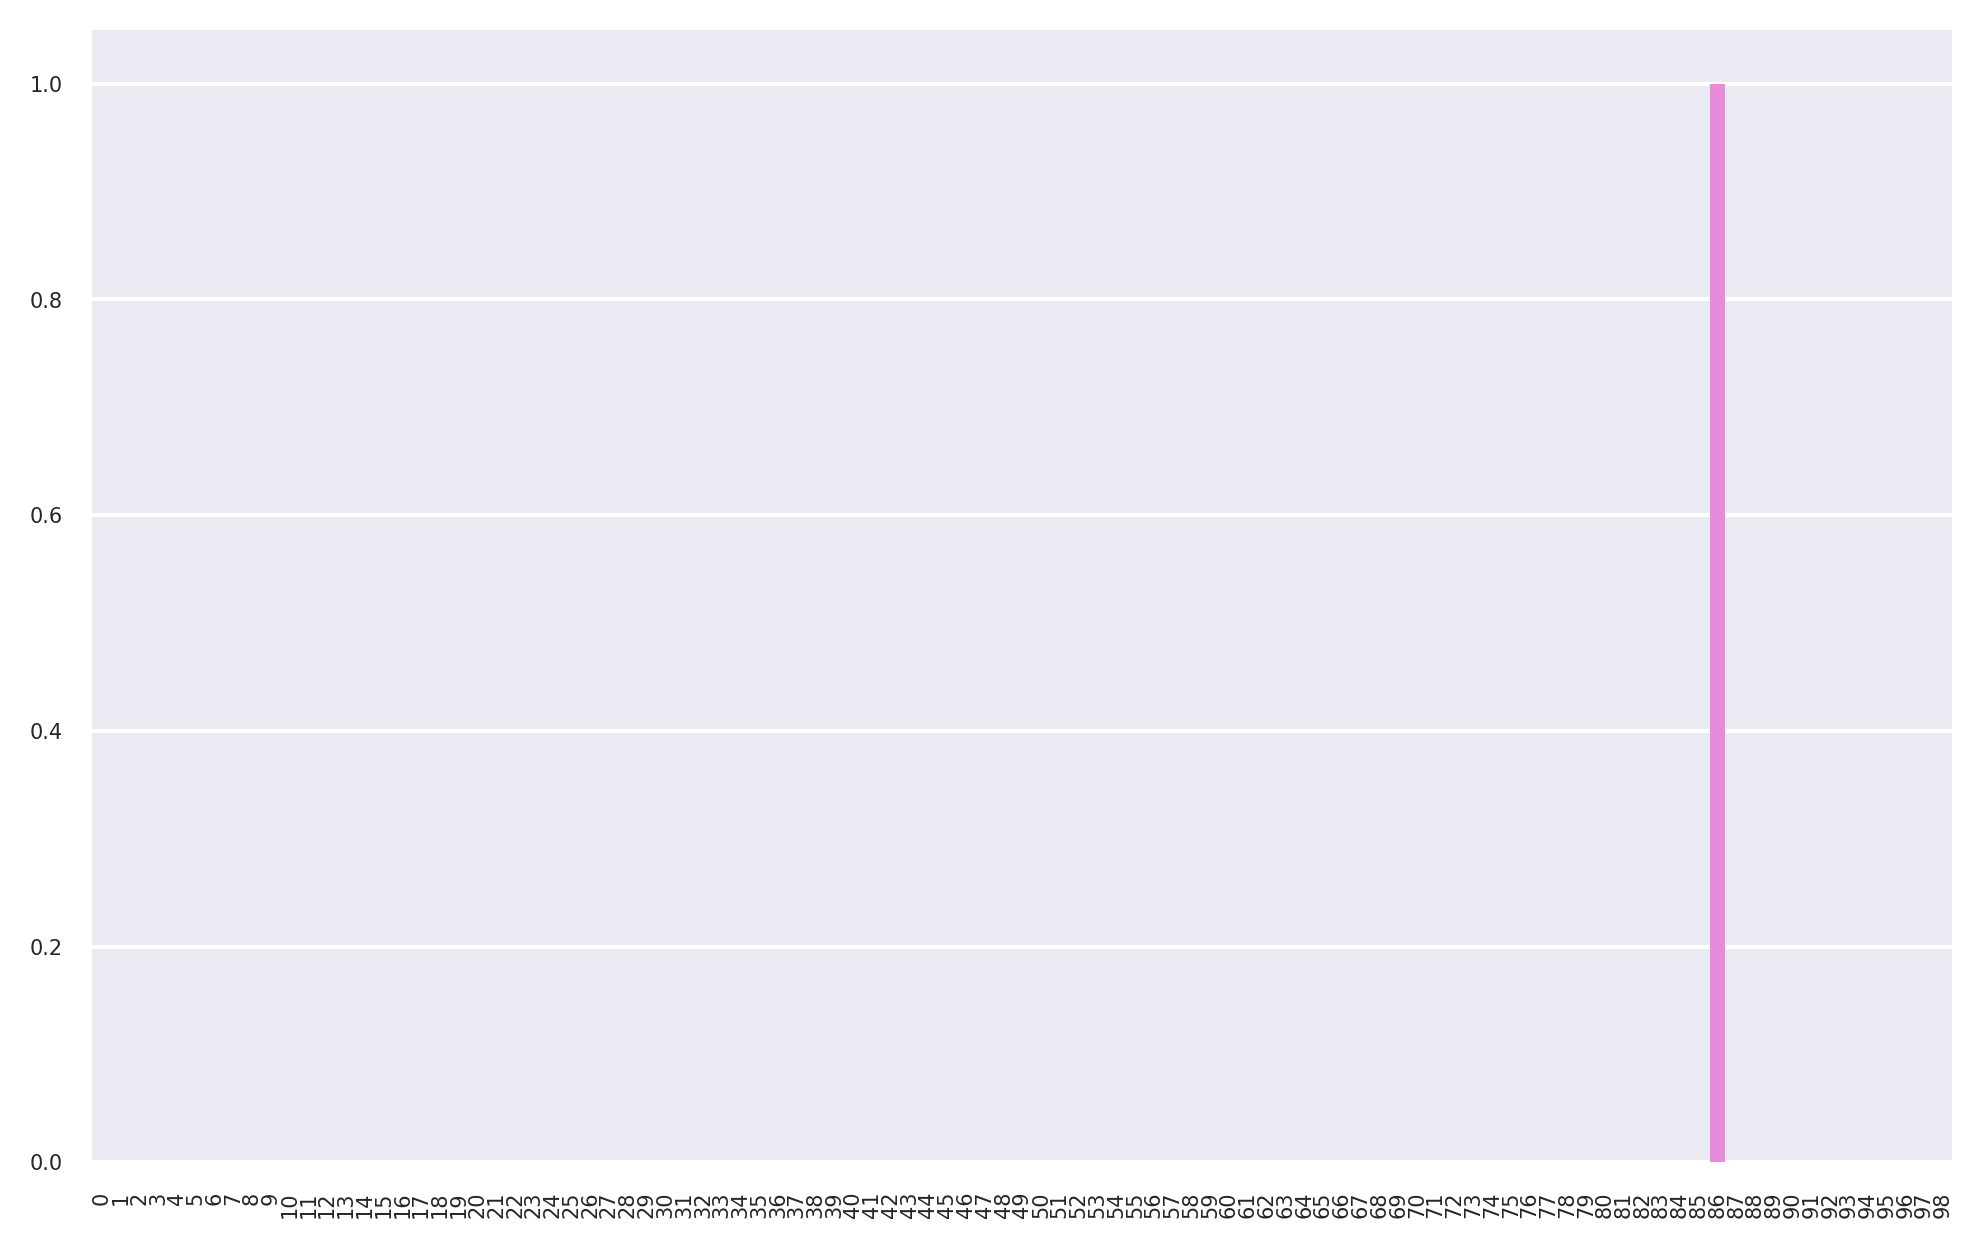

In [32]:
plt.style.use('fivethirtyeight')
sns.set(font_scale=0.5)
g = sns.barplot(x=list(range(99)), y=dfy_pred_proba[0])
g.set_xticklabels(range(99), rotation=90)
plt.grid(False)
plt.show()

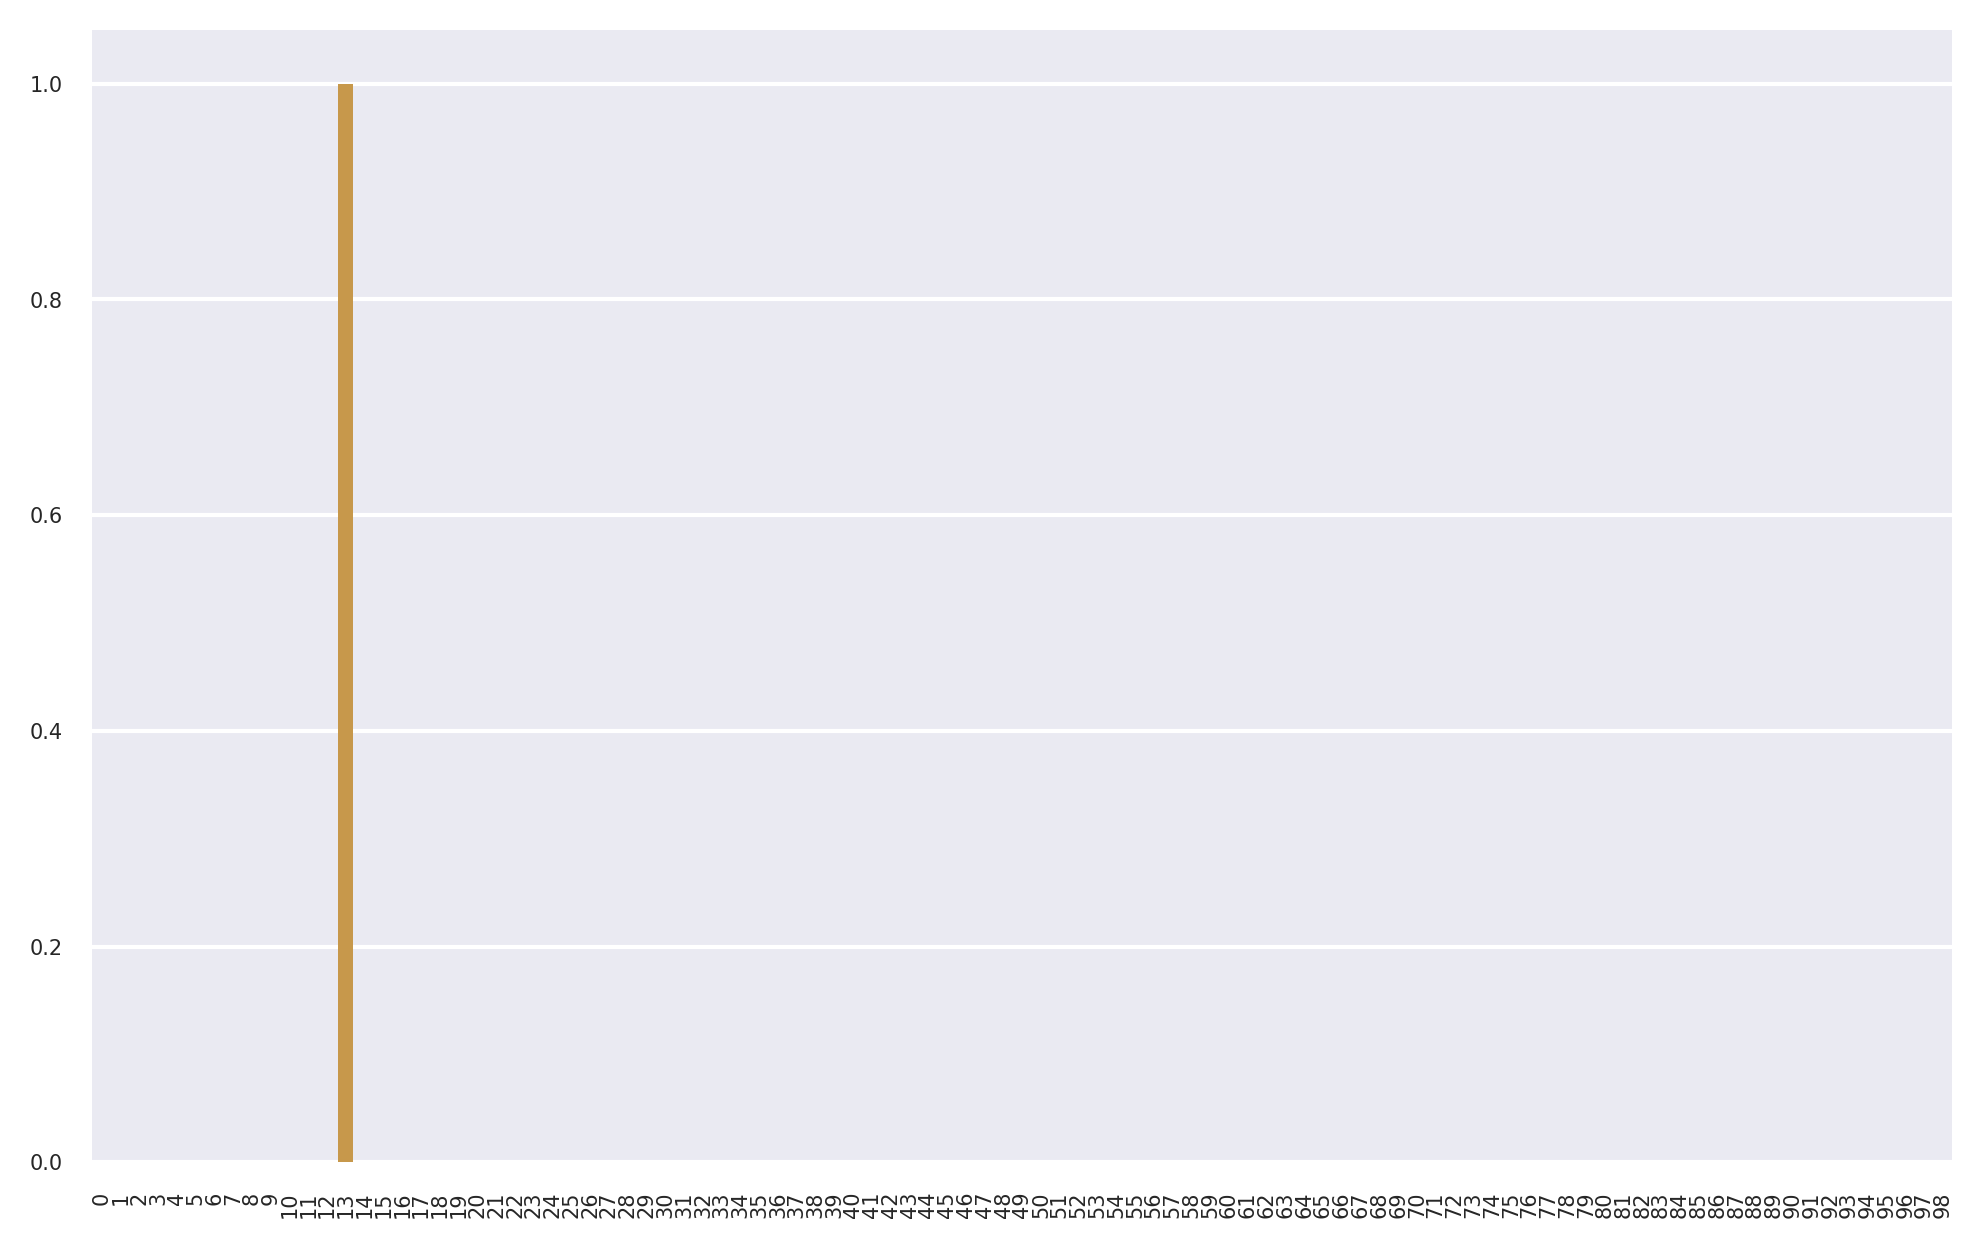

In [33]:
sns.set(font_scale=0.5)
g = sns.barplot(x=list(range(99)), y=dfy_pred_proba[1])
g.set_xticklabels(range(99), rotation=90)
plt.grid(False)
plt.show()

In [34]:
for i in range(len(dfy_pred_proba)):
    print("line" + str(i) + ": " + str(max(dfy_pred_proba[i])))

line0: 0.999927136838
line1: 0.999956110315
line2: 0.999971315633
line3: 0.999998014863
line4: 0.99998745484
line5: 0.999883856006
line6: 0.999980836845
line7: 0.999993458615
line8: 0.999906428091
line9: 0.999999084384
line10: 0.999975969916
line11: 0.999999133139
line12: 0.999994373202
line13: 0.999952466677
line14: 0.99994861565
line15: 0.999896241145
line16: 0.999973447682
line17: 0.999997410931
line18: 0.999997968967
line19: 0.99997496452
line20: 0.999998979379
line21: 0.999979199315
line22: 0.999984755678
line23: 0.999973588068
line24: 0.999999961069
line25: 0.999967408341
line26: 0.999993977111
line27: 0.999983614796
line28: 0.999976969541
line29: 0.999985705608
line30: 0.999899787601
line31: 0.99999786216
line32: 0.999939975526
line33: 0.999999955792
line34: 0.999991124018
line35: 0.99996175873
line36: 0.999985478238
line37: 0.999958986724
line38: 0.999982640012
line39: 0.999985095335
line40: 0.99995966863
line41: 0.999991885325
line42: 0.999925368917
line43: 0.999983341222
line

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train0, y_test0 = train_test_split(dfX, dfy, test_size=0.1)

In [36]:
model1 = LogisticRegression(C=2000, tol=0.0005, class_weight='balanced', solver='lbfgs',\
                                   multi_class = 'multinomial').fit(X_train, y_train0)

In [39]:
dfy1_pred = model.predict(X_train)
dfy1_pred_proba = model.predict_proba(X_train)

In [41]:
print(confusion_matrix(y_train0, dfy1_pred))
print(classification_report(y_train0, dfy1_pred))

[[ 9  0  0 ...,  0  0  0]
 [ 0  9  0 ...,  0  0  0]
 [ 0  0 10 ...,  0  0  0]
 ..., 
 [ 0  0  0 ...,  8  0  0]
 [ 0  0  0 ...,  0  9  0]
 [ 0  0  0 ...,  0  0  9]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         9
          1       1.00      1.00      1.00         9
          2       1.00      1.00      1.00        10
          3       1.00      1.00      1.00         8
          4       1.00      1.00      1.00         8
          5       1.00      1.00      1.00         8
          6       1.00      1.00      1.00        10
          7       1.00      1.00      1.00         8
          8       1.00      1.00      1.00         9
          9       1.00      1.00      1.00         8
         10       1.00      1.00      1.00         8
         11       1.00      1.00      1.00         9
         12       1.00      1.00      1.00        10
         13       1.00      1.00      1.00         9
         14       1.00      1.00      1.

In [42]:
dfy1_test_pred = model.predict(X_test)
dfy1_test_pred_proba = model.predict_proba(X_test)

In [43]:
print(confusion_matrix(y_test0, dfy1_test_pred))
print(classification_report(y_test0, dfy1_test_pred))

[[1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 2 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 2 0 0]
 [0 0 0 ..., 0 1 0]
 [0 0 0 ..., 0 0 1]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         1
          1       1.00      1.00      1.00         1
          3       1.00      1.00      1.00         2
          4       1.00      1.00      1.00         2
          5       1.00      1.00      1.00         2
          7       1.00      1.00      1.00         2
          8       1.00      1.00      1.00         1
          9       1.00      1.00      1.00         2
         10       1.00      1.00      1.00         2
         11       1.00      1.00      1.00         1
         13       1.00      1.00      1.00         1
         14       1.00      1.00      1.00         1
         15       1.00      1.00      1.00         2
         19       1.00      1.00      1.00         1
         20       1.00      1.00      1.00         2
         21       1.00 

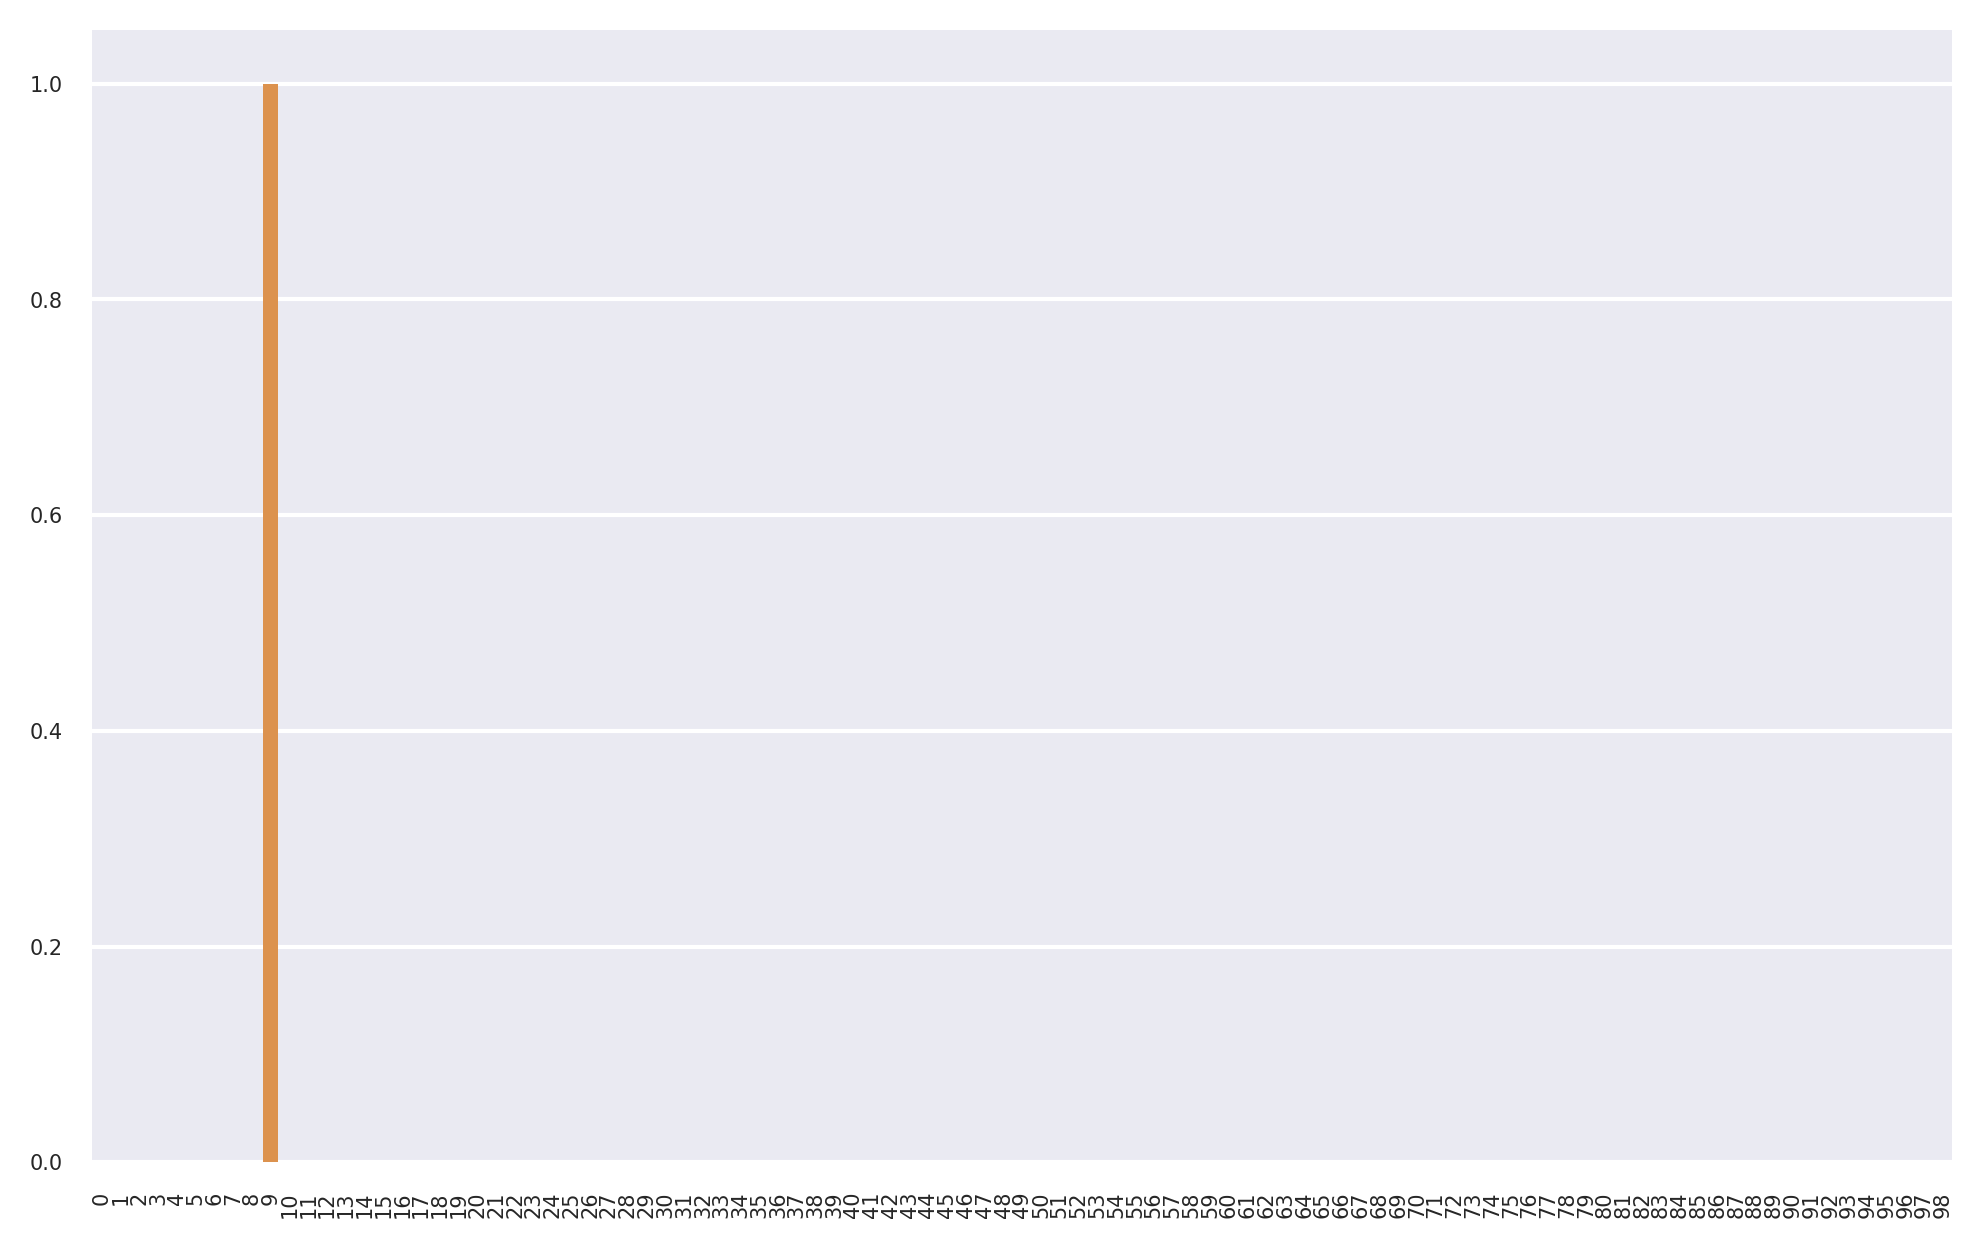

In [44]:
sns.set(font_scale=0.5)
g = sns.barplot(x=list(range(99)), y=dfy1_test_pred_proba[0])
g.set_xticklabels(range(99), rotation=90)
plt.grid(False)
plt.show()

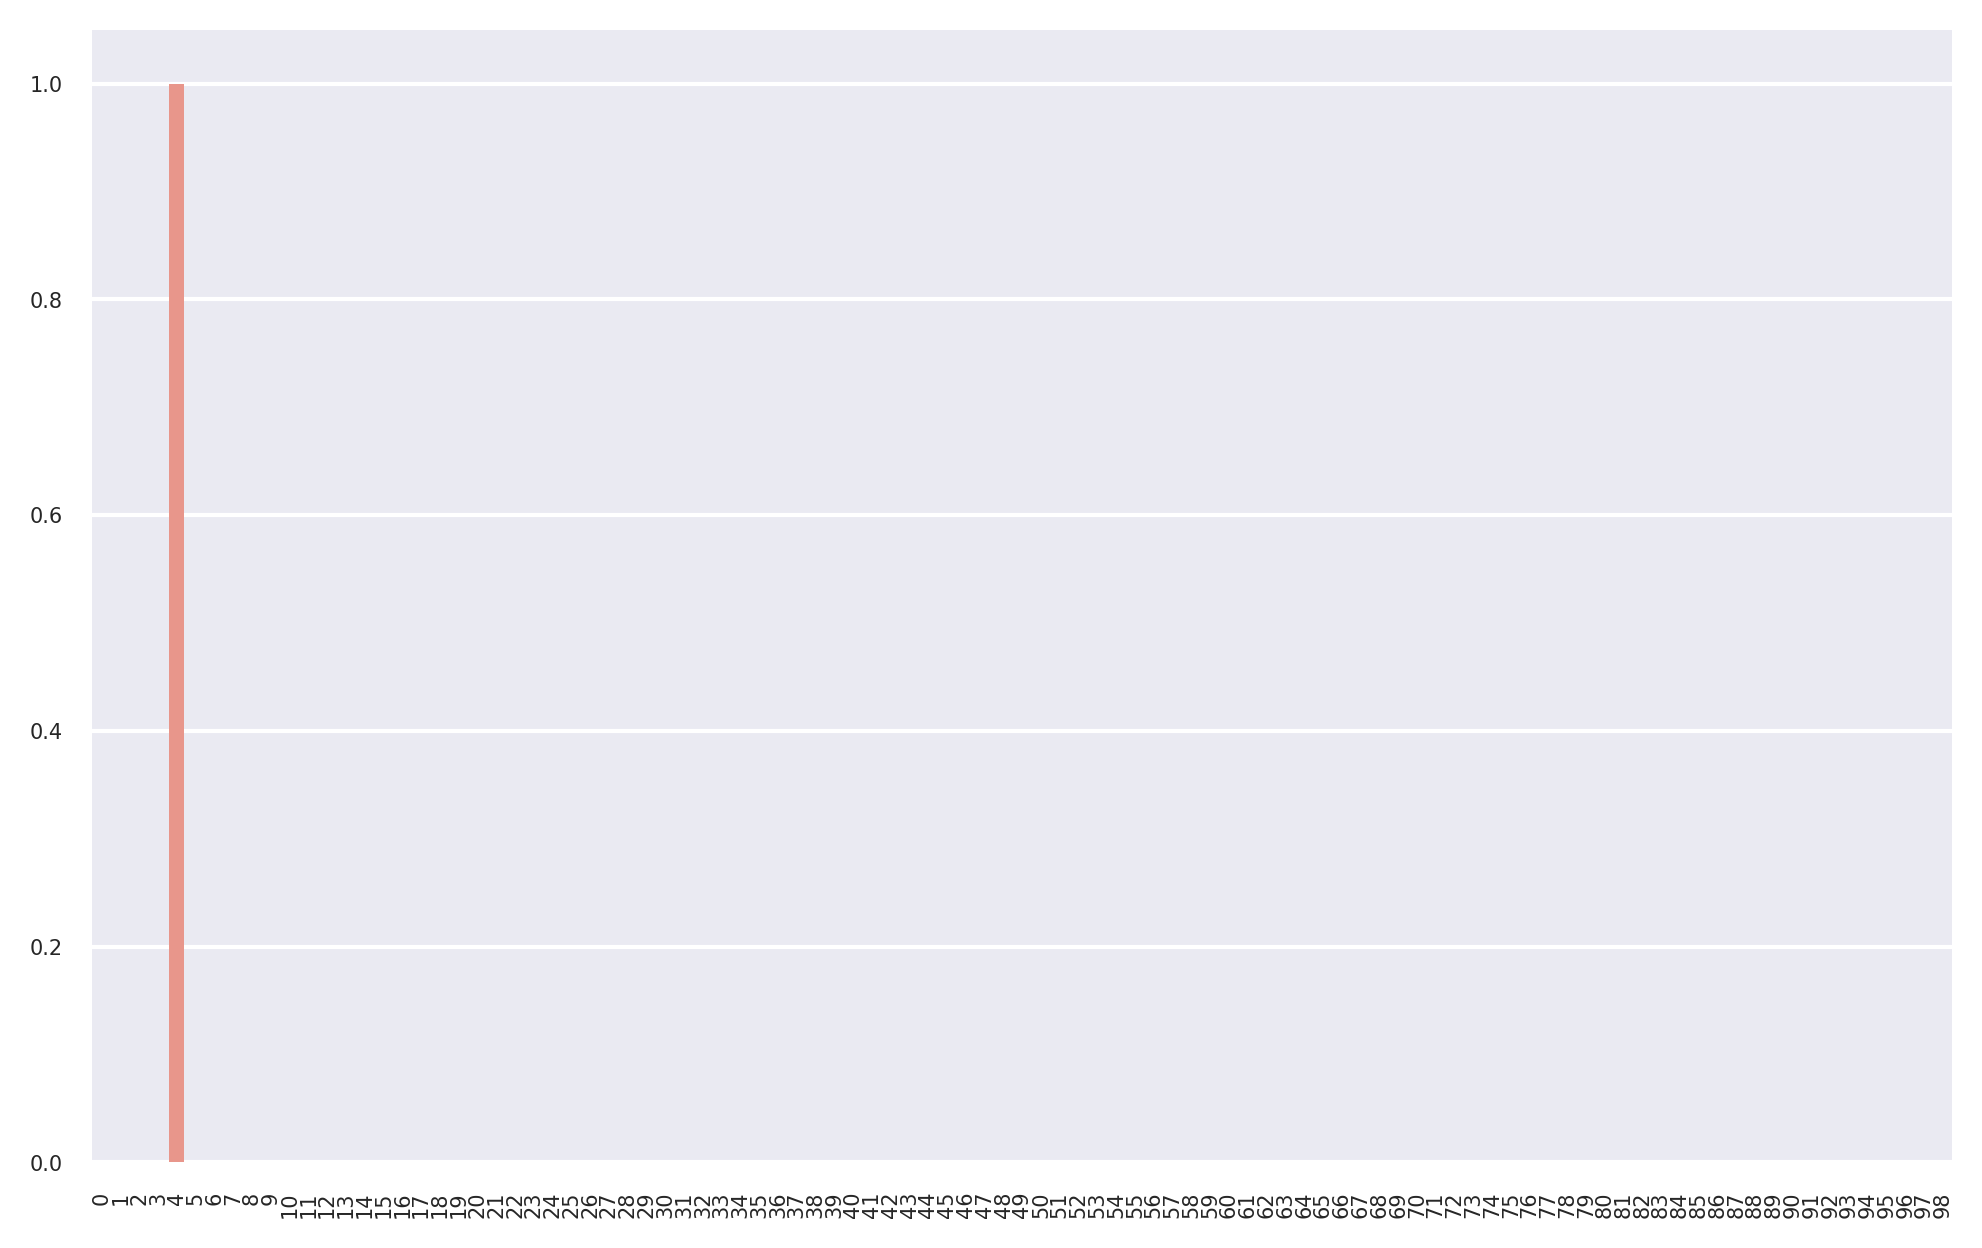

In [45]:
sns.set(font_scale=0.5)
g = sns.barplot(x=list(range(99)), y=dfy1_test_pred_proba[1])
g.set_xticklabels(range(99), rotation=90)
plt.grid(False)
plt.show()

In [46]:
for i in range(len(dfy1_test_pred_proba)):
    print("line" + str(i) + ": " + str(max(dfy1_test_pred_proba[i])))

line0: 0.99995825626
line1: 0.999984695051
line2: 0.999994237245
line3: 0.999989607061
line4: 0.999988073355
line5: 0.999925116292
line6: 0.999994552557
line7: 0.999991171002
line8: 0.999980233545
line9: 0.999991992526
line10: 0.999997292567
line11: 0.999945158349
line12: 0.999984516987
line13: 0.999942198754
line14: 0.999984456961
line15: 0.999963701641
line16: 0.99999198875
line17: 0.999995560914
line18: 0.999998226816
line19: 0.99998871706
line20: 0.999981091226
line21: 0.999979532127
line22: 0.99998232819
line23: 0.999906428091
line24: 0.999945641697
line25: 0.99993849698
line26: 0.999971766772
line27: 0.99997822865
line28: 0.999941886364
line29: 0.999986210466
line30: 0.999957907391
line31: 0.999978663484
line32: 0.999999661442
line33: 0.999999608893
line34: 0.999890248525
line35: 0.999993010898
line36: 0.999999314103
line37: 0.999992013343
line38: 0.999994639528
line39: 0.999908555323
line40: 0.999986522886
line41: 0.99996128512
line42: 0.999972262461
line43: 0.999985320881
line4

In [59]:
model = LogisticRegression(C=2000.0, tol=0.0005, class_weight='balanced', solver = 'lbfgs', \
                                   multi_class = 'multinomial')

bc_model = BaggingClassifier(base_estimator=model, n_estimators=100, \
                                  bootstrap=True, bootstrap_features=True)

cross_val_score(bc_model,dfX, dfy, scoring='neg_log_loss', cv=10)

array([-0.05759186, -0.09897428, -0.03429326, -0.06918317, -0.06422419,
       -0.06778161, -0.07611954, -0.03349465, -0.03428408, -0.04875142])

In [60]:
np.mean([-0.05759186, -0.09897428, -0.03429326, -0.06918317, -0.06422419, \
       -0.06778161, -0.07611954, -0.03349465, -0.03428408, -0.04875142])

-0.058469805999999999

# Test Prediction

In [86]:
model = LogisticRegression(C=1500, tol=0.0005, class_weight='balanced', solver='lbfgs',\
                                   multi_class = 'multinomial').fit(dfX, dfy)
cross_val_score(model, dfX, dfy, scoring='neg_log_loss', cv=10)

array([-0.03355026, -0.04903544, -0.00143841, -0.01903011, -0.02847103,
       -0.02661093, -0.04901214, -0.00345704, -0.00178166, -0.00407421])

In [87]:
np.mean([-0.03355026, -0.04903544, -0.00143841, -0.01903011, -0.02847103,
       -0.02661093, -0.04901214, -0.00345704, -0.00178166, -0.00407421])

-0.021646123

In [91]:
dfy_test_pred = model.predict(dfX_test)
dfy_test_pred_proba = model.predict_proba(dfX_test)

In [103]:
dfy_test_pred_proba_df = pd.DataFrame(dfy_test_pred_proba, columns=sub_list)

In [105]:
final_submission_df = pd.concat([test_id_df, dfy_test_pred_proba_df], axis=1)
final_submission_df.to_csv('final_submission_20171121.csv', index=False)

In [107]:
# !cat final_submission_20171121.csv

![Alt Text](result_submission_20171121.png "result")

#   
# Further
#    

> 1. SVC 개선, Keras, CNN을 적용하여 분석해보자
2. 고유분해 Eigen Value, Vector와 관련해 그래프를 그려보고 파악해보자
3. 카테고리에 PCA와 비슷하게 적용되는 Multiple correspondence analysis를 이용해보자
4. 프로그램화 하여 완성된 제품을 만들어보자